<a href="https://colab.research.google.com/github/Nandeesh-U/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The project focuses on three broad objectives:
* Analyze the sentiments of the reviews given by the customers in the data and make some useful conclusions in the form of Visualizations.

* **For the Company:** Cluster the zomato restaurants into different segments. Use the clustering to solve some business cases for the company to grow up and work on the fields they are currently lagging in.

* **For the customer:** The Analysis should solve some of the business cases that can directly help the customers finding the best restaurant in their locality. - Provide a methodology to find the best restaurants in Gachibowli(may be in various clusters given by the clustering analysis). You may use cuisine and costing info in cost vs. benefit analysis.
Also the metadata of reviewers can be used for identifying the critics in the industry.

# **Attribute Information**

There are two datasets available for us.
1. Zomato Restaurant names and metadata
2. Zomato Restaurant reviews

## **Zomato Restaurant names and Metadata**

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
# Installation of new libraries
!pip install textblob

# Installing a new library called squarify to draw tree maps
# Un-comment the below sentence if squarify is not installed
!pip install squarify

! pip install folium

In [ ]:
# Importing the libraries
from urllib.request import urlopen
import re
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import ast
import scipy
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

import folium
from branca.element import Figure

# Natural Language Tool Kit
import nltk
nltk.download('stopwords')
# to remove stopword
from nltk.corpus import stopwords
# for Stemming purpose
from nltk.stem.porter import PorterStemmer 
# for Calculate Sentiment Polarity
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Mounting the Google Drive folders to google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the data into a csv
names_df = pd.read_csv('/content/drive/MyDrive/Data Squad zomato/Zomato Restaurant names and Metadata.csv')

review_df = pd.read_csv('/content/drive/MyDrive/Data Squad zomato/Zomato Restaurant reviews.csv')

### **Glossary:**
1. Data cleaning of restaurants data
2. Data cleaning of reviews data
3. Univariate analysis
  * Univariate analysis of Restaurants data
  * Univariate analysis of reviews data

# **1) Data Cleaning of Restaurants Data**

## Web scraping for extracting additional data from the weblinks given in the restaurants data sets#
We will use the hyperlinks provided in the **Zomato restaurant names and metadata.csv** file to scrape some extra variables from the websites that may be useful for our ananlysis.

In [ ]:
# Defining a function to scrape the content in the website and return the html script of the page(Scraping already done, so no need to run again.)
'''
def send_request(url):
    response = requests.get(
        url='https://app.scrapingbee.com/api/v1/',
        params={
            'api_key': 'S2X6U0NGJAYG3SLEFPB80L2STD47D3Q7JC8P81J77EYXDS82UE6CBYAZP4AX9O69O0KHHY84U4QCKYTE',
            'url': url,  
        },
        
    )
    #print('Response HTTP Status Code: ', response.status_code)
    #print('Response HTTP Response Body: ', response.content)
    return response
'''

"\ndef send_request(url):\n    response = requests.get(\n        url='https://app.scrapingbee.com/api/v1/',\n        params={\n            'api_key': 'S2X6U0NGJAYG3SLEFPB80L2STD47D3Q7JC8P81J77EYXDS82UE6CBYAZP4AX9O69O0KHHY84U4QCKYTE',\n            'url': url,  \n        },\n        \n    )\n    #print('Response HTTP Status Code: ', response.status_code)\n    #print('Response HTTP Response Body: ', response.content)\n    return response\n"

In [ ]:
# Creating a new column to store the html string of each url
'''
names_df['content'] = np.nan
'''

"\nnames_df['content'] = np.nan\n"

In [ ]:
# Scraping through each url and storing the html string in the content column of the data frame
'''
for i,url in enumerate(names_df['Links']):
  response = send_request(url)
  content = response.content
  names_df.loc[i,'content'] = str(content)
'''

"\nfor i,url in enumerate(names_df['Links']):\n  response = send_request(url)\n  content = response.content\n  names_df.loc[i,'content'] = str(content)\n"

In [ ]:
# Writing the dataframe to a csv to ensure no data loss in working
'''
names_df.to_csv('/content/drive/MyDrive/Data Squad zomato/Nandeesh/names_df_v2')
'''

"\nnames_df.to_csv('/content/drive/MyDrive/Data Squad zomato/Nandeesh/names_df_v2')\n"

In [ ]:
# reading the dataframe from the csv file again to import the scraped data from the already prepared csv file
names_df = pd.read_csv('/content/drive/MyDrive/Data Squad zomato/Nandeesh/names_df_v2.csv')

In [ ]:
# checking for null entries
sum(names_df['content'].isnull())
# No null entries. so all the urls were scraped

0

We will extract the following additional variables from the urls provided to us using regular expressions on the html data scraped using the scraping bee library:
1. Latitude of the restaurant location
2. Longitude of the restaurant location
3. List of additional services offered by the restaurant
4. A binary variable to indicate if the restaurant has featured in the list of popular places in Hyderabad
5. The list of things a given restaurant is famous for.(as expressed by the customers)

In [ ]:
for i, content in enumerate(names_df['content']):
  # updating the string to a soup string to make parsing easier
  soup = str(BeautifulSoup(names_df.loc[i,'content'],"html.parser"))

  # Parsing the latitude and longitude
  tmp = list(re.finditer('https://maps.zomato.com/',soup))
  if len(tmp) == 0:
    names_df.loc[i,'latitude'] = np.nan
    names_df.loc[i,'longitude'] = np.nan
  else:
    loc = tmp[0].span()[0]
    geo_loc = re.findall('=.+&map',soup[loc:loc+200])[0][1:-4]
    names_df.loc[i,'latitude'] = geo_loc.split(',')[0]
    names_df.loc[i,'longitude'] = geo_loc.split(',')[1]

  # Parsing the List of additional services( as a dictionary item in the dataframe column)
  tmp_loc = re.search("More Info",str(soup))
  if tmp_loc==None:
    names_df.loc[i,'additional_services'] = np.nan
  else:
    more_loc = tmp_loc.span()[0]
    tmp = soup[more_loc:]
    inds = list(re.finditer('color="#4F4F4F"',tmp))
    services = list()
    for ind in inds:
      loc = ind.span()[0]
      services.append(re.findall('>.+</p',tmp[loc:loc+50])[0][1:-3])
    names_df.loc[i,'additional_services'] = str(services)
    
  # Identifying if the restaurant has featured in any of the best lists of the city - binary variable = 1 if featured, 0 otherwise
  names_df.loc[i,'Has_Featured'] = int(len(list(re.finditer('Featured In',soup)))>0)

  # Identifying what people associate this restaurant for
  inds = list(re.finditer("People Say This Place Is Known For",str(soup)))
  if len(inds) == 0:
    names_df.loc[i,'known_for'] = np.nan
  else:
    ind = inds[0].span()[0]
    tmp = soup[ind:ind+500]
    names_df.loc[i,'known_for']=re.findall('color="#4F4F4F">.+</p><h3',tmp)[0][16:-7]

In [ ]:
# dropping the content column
names_df.drop('content',axis = 1,inplace = True)

In [ ]:
names_df.head()

,Unnamed: 0,Unnamed: 0.1,Name,Links,Cost,Collections,Cuisines,Timings,latitude,longitude,additional_services,Has_Featured,known_for
0,0,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",17.4288789799,78.3739606768,"['Home Delivery', 'Takeaway Available', 'Seati...",0.0,"Ambience and Service, Courteous Staffs, Cozy, ..."
1,1,1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,17.4423818301,78.3565796167,"['Home Delivery', 'Takeaway Available', 'Valet...",1.0,"Good Food Service, Good for Large Groups, Happ..."
2,2,2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",17.4352545759,78.3680872992,"['Home Delivery', 'Takeaway Available', 'Free ...",1.0,"Value of Money Food, Good for Large Groups, Co..."
3,3,3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,17.4267217841,78.3764155582,"['Home Delivery', 'Takeaway Available', 'Indoo...",1.0,"Delivered on Time, Big Restaurant, Food was Go..."
4,4,4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",17.4401549529,78.3619356528,"['Home Delivery', 'Full Bar Available', 'Free ...",1.0,"Music and Feel, Good Food and Good Service, Am..."


Let us look deeper into the additional services extracted above.

In [ ]:
names_df['additional_services'] = names_df['additional_services'].replace(np.nan,'[]')

In [ ]:
# Creating a master list to find out how many and what catergories of additional services are available in total
master_list_add_servs = list()
for i, add_list in enumerate(names_df['additional_services']):
  master_list_add_servs.extend(ast.literal_eval(names_df.loc[i,'additional_services']))
master_list_add_servs = list(set(master_list_add_servs))

In [ ]:
len(master_list_add_servs)

51

In [ ]:
# So there are 9 unique additional services in total

In [ ]:
master_list_add_servs

['Outdoor Seating',
 'Kid Friendly',
 'Gaming Area',
 'Smoking Area',
 'Work Friendly',
 'Wifi',
 'Shared Seating Area',
 'Breakfast',
 'Dance Floor',
 'Delivery Only',
 'Dress Code Applicable',
 'Valet Parking Available',
 'Live Entertainment',
 'Indoor Seating',
 'Takeout Available',
 'Full Bar Available',
 'Serves Cocktails',
 'Live Sports Screening',
 'Serves Alcohol',
 'Available for Functions',
 'Rooftop',
 'Happy Hours',
 'Free Parking',
 'Wheelchair Accessible',
 'Standing Tables',
 'Mall Parking',
 'Romantic Dining',
 'Brunch',
 'Vegetarian Only',
 'Family Friendly',
 'Live Music',
 'Private Dining Area Available',
 'Home Delivery',
 'Disabled Friendly',
 'Pet Friendly',
 'High Chair Available',
 'Free Wifi',
 'No Seating Available',
 'Restricted Entry',
 'Table Reservation Not Required',
 'Nightlife',
 'Takeaway Available',
 'Luxury Dining',
 'Group Meal',
 'Buffet',
 'Table reservation required',
 'Craft Beer',
 'Desserts and Bakes',
 'Seating Available',
 'Table booking rec

'Outdoor Seating',
 'Kid Friendly',
 'Gaming Area',
 'Smoking Area',
 'Work Friendly',
 'Wifi',
 'Shared Seating Area',
 'Breakfast',
 'Dance Floor',
 'Delivery Only',
 'Dress Code Applicable',
 'Valet Parking Available',
 'Live Entertainment',
 'Indoor Seating',
 'Takeout Available',
 'Full Bar Available',
 'Serves Cocktails',
 'Live Sports Screening',
 'Serves Alcohol',
 'Available for Functions',
 'Rooftop',
 'Happy Hours',
 'Free Parking',
 'Wheelchair Accessible',
 'Standing Tables',
 'Mall Parking',
 'Romantic Dining',
 'Brunch',
 'Vegetarian Only',
 'Family Friendly',
 'Live Music',
 'Private Dining Area Available',
 'Home Delivery',
 'Disabled Friendly',
 'Pet Friendly',
 'High Chair Available',
 'Free Wifi',
 'No Seating Available',
 'Restricted Entry',
 'Table Reservation Not Required',
 'Nightlife',
 'Takeaway Available',
 'Luxury Dining',
 'Group Meal',
 'Buffet',
 'Table reservation required',
 'Craft Beer',
 'Desserts and Bakes',
 'Seating Available',
 'Table booking recommended',
 'No Alcohol Available'

In [ ]:
# Replacing nan values with an empty list
names_df['additional_services'] = names_df['additional_services'].replace(np.nan,'[]')

In [ ]:
# Creating a column for each of the 9 additional services through one hot encoding
encode_list = list()
for adds_list in names_df['additional_services']:
  tmp = ast.literal_eval(adds_list)
  tmp_dict = dict()
  for service in master_list_add_servs:
    if service in tmp:
      tmp_dict.update({service:1})
    else:
      tmp_dict.update({service:0})
  encode_list.append(tmp_dict)

# Converting the list of dictionaries to a dataframe
add_services_df = pd.DataFrame(encode_list)

In [ ]:
# Appending the new columns to the names_df dataframe
names_df = pd.concat([names_df,add_services_df],axis = 1)
names_df.drop('additional_services',axis = 1,inplace = True)

Let us explore the 'known_for' column.

In [ ]:
# Cleaning the 'People say this is known for' column
names_df['known_for'] = names_df['known_for'].replace(np.nan,'')

# Some observations in this column has extra unnecessary text that starts with 'class='. Identifying them and removing
bool_series = names_df['known_for'].str.contains('class=')
for i in names_df.loc[bool_series].index:
  tmp = names_df.iloc[i]['known_for']
  names_df.at[i,'known_for'] = tmp[:tmp.find('<')]

The observations inside the timings column are given in very inconsistent format. Let us explore the column to extract key information.

In [ ]:
names_df['Timings'].values[:5]

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)'],
      dtype=object)

In [ ]:
# Replacing the missing values with empty strings
names_df['Timings']=names_df['Timings'].replace(np.nan,'')

# Converting the strings in the column to lowercase
names_df['Timings'] = names_df['Timings'].str.lower()

In [ ]:
def multiple_str_replaces(org_str,maps):
  '''
  This function takes a dictionary of mapping with keys as the charecters to be replaced in a string and
  the values as the characters to be replaced with
  '''
  for l,r in maps.items():
    org_str = org_str.replace(l,r)
  return org_str

In [ ]:
# Defining the list of things we want to format by replacements.
mappings = {'noon':'pm','midnight':'am','),':');'}

# Applying the above changes to all the entries in the column
names_df['Timings'] = names_df['Timings'].apply(lambda x: multiple_str_replaces(x,maps = mappings))

In [ ]:
def drop_closed_days(in_str):
  '''
  This function deletes the days when the restaurant is closed Ex: the text tue closed, thu closed will be deleted
  '''
  regex = re.compile('[a-z]{3} closed|closed \([a-z]{3}\)')
  result = re.findall(regex,in_str)
  for text in result:
    in_str = in_str.replace('; '+text,'')
  return in_str

In [ ]:
# Applying the above function
names_df['Timings'] = names_df['Timings'].apply(lambda x: drop_closed_days(x))

In [ ]:
def expand_days(in_str):
  '''
  This function takes a from-to of week days string and replaces it with all the days in between.
  For Ex: 'tue-sat' will be replaced by 'tue,wed,thu,fri,sat'
  '''
  days = ['mon','tue','wed','thu','fri','sat','sun']
  in_days = in_str.split('-')
  
  result = ''

  for i,day in enumerate((days*2)[(days*2).index(in_days[0]):]):
    if day == in_days[1]:
      result = result+', '+day
      break
    elif i==0:
      result = result+day
    else:
      result = result+', '+day
  return result

In [ ]:
def open_days(in_str):
  '''
  This function returns the list of days on which a restaurant is open given a string of 'timings' column as argument
  '''
  regex = re.compile(".*?\((.*?)\)")
  result = re.findall(regex, in_str)
  for i,text in enumerate(result):
    if '-' in text:
      result[i] = expand_days(result[i])
    else:
      pass
  result = ', '.join(result)
  if result == '':
    result = ''
  else:
    result = str(list(set(result.split(', '))))
  return result

In [ ]:
# Manually updating an occurence which is in a different format
names_df.at[95,'Timings'] = '1 pm to 2 am (mon), (wed-sun)'

# Applying the above function all the occurences in the timings column
names_df['Open_days'] = names_df['Timings'].apply(lambda x: open_days(x))

# Assuming that the restaurants whose open days are not listed are open on all days
names_df['Open_days']=names_df['Open_days'].replace('',str(['mon','tue','wed','thu','fri','sat','sun']))

In [ ]:
names_df['Open_days'].values[:10]

array(["['sun', 'sat', 'mon', 'tue', 'fri', 'thu', 'wed']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['sun', 'sat', 'mon', 'tue', 'fri', 'thu', 'wed']",
       "['sun', 'sat', 'mon', 'tue', 'fri', 'thu', 'wed']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['sun', 'sat', 'mon', 'tue', 'fri', 'thu', 'wed']"], dtype=object)

In [ ]:
# Writing the updated dataframe to a csv file
names_df.to_csv('/content/drive/MyDrive/Data Squad zomato/Nandeesh/names_df_v3.csv')

In [ ]:
#Dropping the redundant columns
names_df.drop(['Links','Unnamed: 0','Unnamed: 0.1'],axis = 1, inplace = True)

# Cuisine data cleaning

In [ ]:
# spliting the cusines and storing in list 
cuisine_list=names_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [ ]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1

In [ ]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

In [ ]:
cuisine_df.head()

,Cuisine,Number of Restaurants
0,Chinese,43
1,Continental,21
2,Kebab,6
3,European,4
4,South Indian,9


In [ ]:
cuisine_df.to_csv('/content/drive/MyDrive/Data Squad zomato/tmp.csv')

In [ ]:
cuisine_df['Cuisine'].values

array(['Chinese', 'Continental', 'Kebab', 'European', 'South Indian',
       'North Indian', 'Biryani', 'Asian', 'Mediterranean', 'Desserts',
       'Seafood', 'Beverages', 'Goan', 'Healthy Food', 'Lebanese',
       'American', 'Ice Cream', 'Street Food', 'Fast Food', 'BBQ',
       'Italian', 'Finger Food', 'Burger', 'Japanese', 'Salad', 'Sushi',
       'Mexican', 'Mughlai', 'Andhra', 'Bakery', 'Juices', 'Arabian',
       'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai', 'Indonesian',
       'Modern Indian', 'Momos', 'Pizza', 'North Eastern', 'Mithai',
       'Malaysian'], dtype=object)

# **2) Data Cleaning of Reviews data**

In [ ]:
review_df.shape

(10000, 7)

In [ ]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


The number of missing values is very less. Let us just drop them.

In [ ]:
review_df.dropna(inplace = True)

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


Let us convert the rating column to numeric format.

In [ ]:
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

Some of the ratings are given as 'Like'. Let us find out how many of them are listed like that

In [ ]:
review_df[review_df.Rating=='Like'].shape[0]

1

Just one occurence, so we can just replace it by a score of 5.

In [ ]:
# So Lets repalce the "Like" into Rating "5"
review_df.Rating = review_df.Rating.replace('Like', '5')

In [ ]:
# converting the ratings column to a float
review_df['Rating'] = review_df['Rating'].astype(float)

Let us split the metadata column into reviews and followers

In [ ]:
def extract_no(in_str):
  '''
  This function takes an observation in the metadata column and returns the number of reviews and
  no of followers as a list
  '''
  in_str = in_str.lower()
  split_list = in_str.split(',')
  result = [0,0]
  for i in split_list:
    if 'review' in i:
      result[0] = int(re.search('\d+',i).group())
    elif 'follower' in i:
      result[1] = int(re.search('\d+',i).group())
  return result

In [ ]:
# Creating two additional columns
review_df['No_of_review'] = review_df['Metadata'].apply(lambda x: extract_no(x)[0])
review_df['No_of_Follower'] = review_df['Metadata'].apply(lambda x: extract_no(x)[1])

# Dropping the Metadata column
review_df.drop('Metadata',axis=1,inplace=True)

# **3) Univariate Analysis**

## Univariate analysis of the Restaurants data

In [ ]:
names_df.shape

(105, 19)

In [ ]:
names_df.head()

,Name,Cost,Collections,Cuisines,Timings,latitude,longitude,Has_Featured,known_for,Romantic Dining,Takeaway Available,Valet Parking Available,Indoor Seating,Buffet,Wifi,Seating Available,Table booking recommended,Home Delivery,Open_days
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12pm to 3:30pm, 6:30pm to 11:30pm (mon-sun)",17.4288789799,78.3739606768,0.0,"Ambience and Service, Courteous Staffs, Cozy, ...",1,1,1,1,1,1,1,1,1,"['sun', 'sat', 'mon', 'tue', 'fri', 'thu', 'wed']"
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 am to 11 pm,17.4423818301,78.3565796167,1.0,"Good Food Service, Good for Large Groups, Happ...",0,1,1,1,0,0,0,0,1,"['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']"
2,Flechazo,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 am to 4:30 pm, 6:30 pm to 11 pm",17.4352545759,78.3680872992,1.0,"Value of Money Food, Good for Large Groups, Co...",0,1,0,1,1,1,0,1,1,"['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 pm to 2 am,17.4267217841,78.3764155582,1.0,"Delivered on Time, Big Restaurant, Food was Go...",0,1,0,1,0,0,0,0,1,"['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']"
4,Over The Moon Brew Company,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12pm to 11pm (mon, tue, wed, thu, sun); 12pm t...",17.4401549529,78.3619356528,1.0,"Music and Feel, Good Food and Good Service, Am...",1,0,0,1,0,0,0,0,1,"['sun', 'sat', 'mon', 'tue', 'fri', 'thu', 'wed']"


In [ ]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       105 non-null    object 
 1   Cost                       105 non-null    object 
 2   Collections                51 non-null     object 
 3   Cuisines                   105 non-null    object 
 4   Timings                    105 non-null    object 
 5   latitude                   104 non-null    object 
 6   longitude                  104 non-null    object 
 7   Has_Featured               105 non-null    float64
 8   known_for                  105 non-null    object 
 9   Romantic Dining            105 non-null    int64  
 10  Takeaway Available         105 non-null    int64  
 11  Valet Parking Available    105 non-null    int64  
 12  Indoor Seating             105 non-null    int64  
 13  Buffet                     105 non-null    int64  

### 1) Cost

In [ ]:
# changing the data type of the cost function
names_df['Cost'] = names_df['Cost'].str.replace(",","").astype('int64')

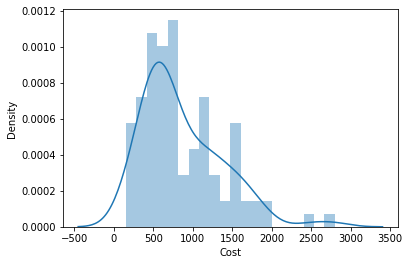

In [ ]:
## Let us look at the distribution of the per person costs of the restaurants
sns.distplot(a=names_df['Cost'], bins=20,kde=True,hist = True)

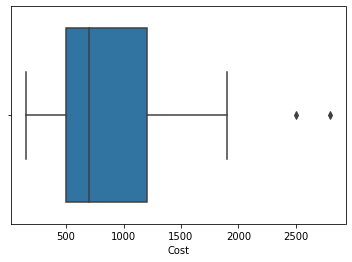

In [ ]:
# Boxplot of the cost variable
sns.boxplot(x=names_df['Cost'])

The distribution of cost is positively skewed with a median of around 700 Rs. per person. The restaurants are mostly in the range of 100-2000 Rs. per person.

### 2) Collections

This column has too many missing values(>50%) and it is mainly text based and we have extracted similar and more reliable information from the website in the 'known_for' column. So we can drop this column

In [ ]:
names_df.drop('Collections',axis = 1, inplace=True)

### 3) Cuisines

#need work here

In [ ]:
cuisine_counts = names_df['Cuisines'].value_counts().reset_index()

In [ ]:
cuisine_counts

,index,Cuisines
0,"North Indian, Chinese",4
1,North Indian,3
2,"Ice Cream, Desserts",2
3,"Biryani, North Indian, Chinese",2
4,"South Indian, North Indian, Chinese",2
...,...,...
87,"Biryani, South Indian, North Indian, Chinese, ...",1
88,"Italian, North Indian, South Indian, Asian",1
89,"North Indian, Fast Food",1
90,"Arabian, North Indian, Chinese",1


In [ ]:
cat_more_100 = more_than_100['Category'].value_counts().reset_index().rename(columns= {'index':'Category','Category':'Count'})
cat_more_100.index=cat_more_100['Category']
squarify.plot(sizes=cat_more_100['Count'], label=cat_more_100['Category'], alpha=0.6)

NameError: ignored

### 4) Latitude and Longitude
Let us visualize the locations of the restaurants using maps

In [ ]:
# We know from the above table(from names_df.info()) that there is one missing item in the latitude and longitudes. Let us just drop it
names_df.dropna(subset = ['latitude','longitude'],inplace = True)

In [ ]:
names_df.shape

(104, 18)

In [ ]:
# latitudes and longitudes are currently in the string format. We need to convert them into a numeric format
names_df['latitude'] = names_df['latitude'].astype(float)
names_df['longitude'] = names_df['longitude'].astype(float)

In [ ]:
# Creating the folium map variable
mapit = folium.Map(width=750,height=450,
                   location=[names_df.iloc[3]['latitude'],names_df.iloc[5]['longitude']],
                   zoom_start=13,min_zoom=12,max_zoom=20)

mapit.save('map.html')

In [ ]:
# Adding the markers of restaurant locations
for i in names_df.index:
  folium.Marker(location=[names_df.latitude[i], names_df.longitude[i]]).add_to(mapit)

In [ ]:
mapit

Majority of the restaurants seem to be located on the old-bombay highway. It is interesting to note that three clear clusters are visible clearly:
1. Along the old bombay highway
2. Below the highway(towards ISB)
3. Above the highway(towards Botanical gardens)

### 5) All the binary variables(Has featured and additional services)

In [ ]:
# Creating the list of binary variables
bin_vars = ['Has_Featured']+master_list_add_servs

bin_df = round((names_df[bin_vars].sum()/names_df.shape[0])*100,1).reset_index()
bin_df.columns = ['Variable','% of restaurants']
bin_df

,Variable,% of restaurants
0,Has_Featured,26.0
1,Romantic Dining,10.6
2,Takeaway Available,68.3
3,Valet Parking Available,20.2
4,Indoor Seating,68.3
5,Buffet,14.4
6,Wifi,20.2
7,Seating Available,5.8
8,Table booking recommended,23.1
9,Home Delivery,69.2


* Gachibowli seems to be have a lot of very famous restaurants since 26% of the restaurants in this small area alone have featured in the list of Hyderabad's best restaurants.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

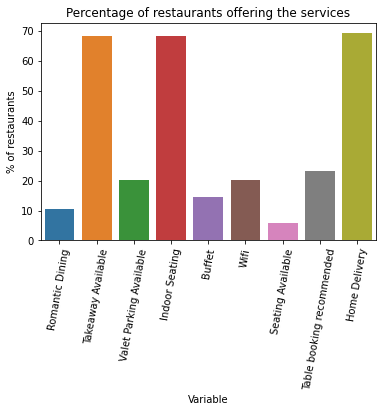

In [ ]:
# Let us look at the bar plot of the share of restaurants that offer each of the additional services
sns.barplot(x='Variable',y='% of restaurants',data = bin_df.iloc[1:])
plt.title('Percentage of restaurants offering the services')
plt.xticks(rotation=80)

* It is interesting to note that 70% of the restaurants have home delivery services as well as indoor dining facilities available.

### 6) Open days

In [ ]:
names_df['Open_days']

0      ['sun', 'sat', 'mon', 'tue', 'fri', 'thu', 'wed']
1      ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
2      ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
3      ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
4      ['sun', 'sat', 'mon', 'tue', 'fri', 'thu', 'wed']
                             ...                        
100    ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
101    ['sun', 'sat', 'mon', 'tue', 'fri', 'thu', 'wed']
102    ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
103    ['sun', 'sat', 'mon', 'tue', 'fri', 'thu', 'wed']
104    ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
Name: Open_days, Length: 104, dtype: object

At an initial glance it appears that significant majority of the restaurants are open on all the days of the week.(But note that some restaurants open for only a few hours on some days of the week). Let us look at the restaurants that are not open on all days to look at them easily.

In [ ]:
x=names_df['Open_days'][0]

In [ ]:
sum(names_df['Open_days'].apply(lambda x: int(len(ast.literal_eval(x))<7)))

5

Only 5 restaurants do not open on all days of the week.

## Univariate analysis of the Reviews data

In [ ]:
review_df.shape

(10000, 7)

In [ ]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


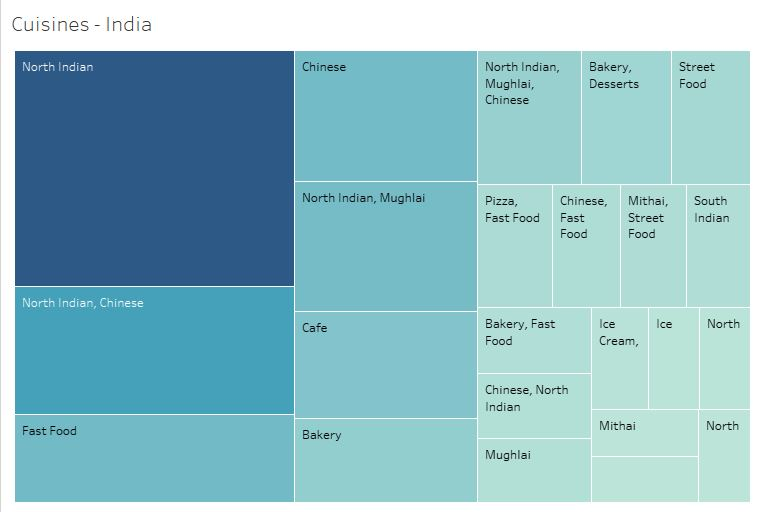

In [ ]:
#Ratings vs cost

In [ ]:
'''
Summary/Recommendations

90% of observations belong to India.
USA(4) has higher ratings than India(3.5) and a majority of Indian restaurants have 0 ratings. Either Zomato should nudge customers to rate or these are newly onboarded restaurants.
US customers provide ratings more frequently and consistently than Indians.
Popular Indian cuisine is North Indian owing to4 major North Indian cities and for the USA it’s all Americana food.
India and US have moderate food prices as compared to the rest of the countries.
Better affordability has led to restaurants offering in price range 1 but this could affect Zomato’s unit economics. The average price range 1 is Rs 284, except this, all the rest price ranges provide positive returns based on previous analysis on unit economics.
Positive relation exists between ratings and the average cost for two, this could be because of the assumed notion that premium restaurants have good ambiance or better service, whereas regular restaurants cannot provide such an experience which could lead to lower ratings.
Provide reservations and online delivery to receive valuable customer feedback and rating.
Nudge price range 1 and 2 restaurant’s customers to vote more number of time.
Dine-in without reservation is cheaper for price range 1,2,3 restaurants, as no commission is charged.